In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(r'C:\Users\tomas\Documents\Repozytoria\uczenie_maszynowe_w_pythonie\00_data_sources\Airbnb listings in Ottawa (May 2016).csv')
df.shape

(1496, 16)

In [5]:
df.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,25468,106030,Private room,NaN,BEACON HILL-CYRVILLE,8,4.5,2,1.0,NaN,29.0,2.0,45.450053,-75.589091,2016-05-16 23:47:32.757633
1,1,34220,147438,Private room,NaN,CAPITAL,0,NaN,2,1.0,1.0,161.0,7.0,45.409237,-75.678999,2016-05-16 23:14:17.559013
2,2,36642,157787,Private room,NaN,KITCHISSIPPI,60,4.5,2,1.0,NaN,56.0,1.0,45.401591,-75.746794,2016-05-16 23:12:51.307224
3,3,42100,184023,Private room,NaN,GLOUCESTER-SOUTH NEPEAN,0,NaN,1,1.0,2.0,31.0,1.0,45.320071,-75.607080,2016-05-16 22:58:04.288813
4,4,59258,284351,Entire home/apt,NaN,BAY,1,NaN,4,1.0,1.0,128.0,3.0,45.358996,-75.803144,2016-05-17 00:11:06.877538


In [7]:
coordinates = df.loc[:, ['longitude', 'latitude']]
coordinates.shape

(1496, 2)

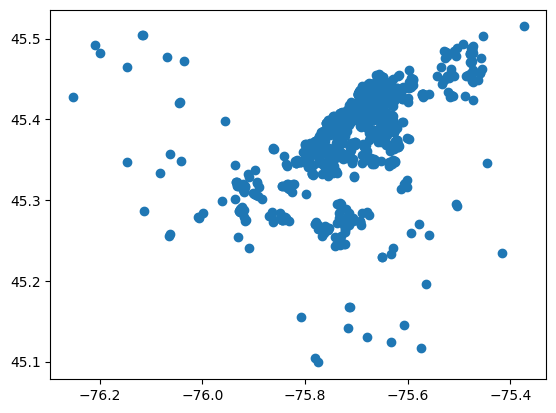

In [8]:
plt.scatter(df.loc[:,'longitude'], df.loc[:, 'latitude'])
# chcemy podzielić podane na wykresie lokalizacje na grupy, które będzie obsługiwać fachowiec w razie awarii
# liczy się to, aby dany fachowiec miał w miarę możliwości blisko do każdej z lokalizacji

In [9]:
WCSS = [] #within-cluster-sum-of-squares

In [10]:
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(coordinates)
    WCSS.append(kmeans.inertia_)

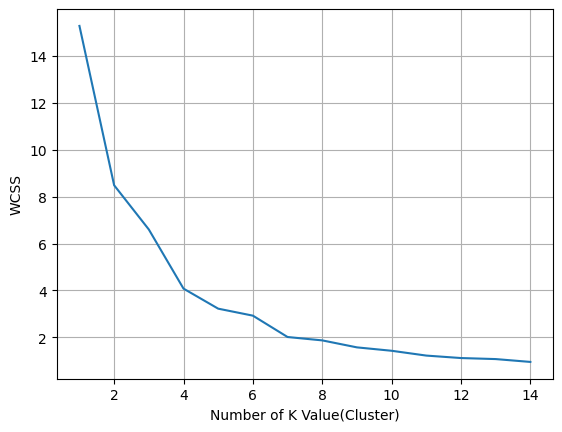

In [12]:
plt.plot(range(1, 15), WCSS)
plt.xlabel('Number of K Value(Cluster)')
plt.ylabel('WCSS')
plt.grid()
plt.show()
# idealna liczba grup mieści się na przegięciu 'łokcia', czyli tam, gdzie wykres się łamie

In [16]:
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=1)
clusters = kmeans.fit_predict(coordinates)
labels = kmeans.labels_ # dla każdej próbki przechowuje numer klastra
centroids = kmeans.cluster_centers_ # punkty centralne dla każdej z grup

In [15]:
h = 0.001
x_min, x_max = coordinates['longitude'].min(), coordinates['longitude'].max()
y_min, y_max = coordinates['latitude'].min(), coordinates['latitude'].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


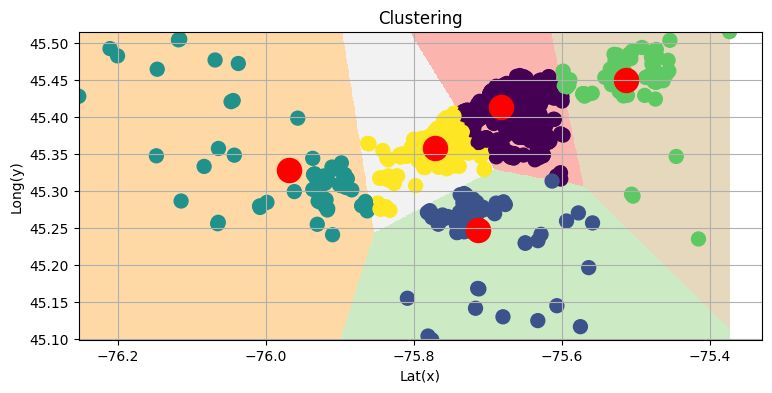

In [18]:
plt.figure(1, figsize=(10, 4))
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                                               cmap = plt.cm.Pastel1, origin='lower')
plt.scatter(x=coordinates['longitude'], y=coordinates['latitude'], c=labels, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red')

plt.ylabel('Long(y)')
plt.xlabel('Lat(x)')
plt.grid()
plt.title('Clustering')
plt.show()

In [19]:
centroids

array([[-75.6817256 ,  45.41392421],
       [-75.71304664,  45.24705222],
       [-75.96804293,  45.32755338],
       [-75.51393768,  45.4495341 ],
       [-75.77188469,  45.35854083]])

In [22]:
labels

array([3, 0, 4, ..., 0, 0, 1])